<a href="https://colab.research.google.com/github/mani7942/CS253/blob/main/Python_Assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data pre-processing

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


data = pd.read_csv("./train.csv", header=0)
test_data = pd.read_csv("./test.csv", header=0)

print('Data loaded')

# takes data frame as input and replaces the missing values with most frequent values
def handle_missing_values(df):
    # Identify columns with missing values
    cols_with_missing = df.columns[df.isnull().any()]

    # Iterate through each column with missing values
    for col in cols_with_missing:
        # For numerical columns, replace missing values with the mean
        if df[col].dtype == 'float64':
            imputer = SimpleImputer(strategy='mean')
        # For categorical columns, replace missing values with the most frequent value
        else:
            imputer = SimpleImputer(strategy='most_frequent')

        # Fit the imputer on the column with missing values and transform the data
        df[col] = imputer.fit_transform(df[[col]])

    return df

data = handle_missing_values(data)
test_data = handle_missing_values(test_data)


# converts the string values to numerical values using correct converstion factors
def convert_to_rupees(val):
    # Split the input value by spaces to separate the numerical amount and unit type
    parts = val.split()
    # Extract the numerical amount as a floating-point number
    amount_value = float(parts[0])
    # Extract the unit type (e.g., Crore+, Lac+, Thou+, etc.) from the last part of the split string
    unit_type = parts[-1]

    # Define a dictionary to map unit types to their corresponding conversion factors
    conversion_factors = {
        'Crore+': 10000000,
        'Lac+': 100000,
        'Thou+': 1000,
        'Hund+': 100,
        '0': 0,  # Handle cases where the unit type is '0'
    }

    # Get the conversion factor from the dictionary based on the unit type
    factor = conversion_factors.get(unit_type, None)
    # Check if a valid conversion factor was obtained
    if factor is not None:
        # Multiply the numerical amount by the conversion factor to convert to Rupees
        return amount_value * factor
    else:
        # Raise a ValueError if the unit type is not recognized or invalid
        raise ValueError("Invalid unit type")


data['Total Assets'] = data['Total Assets'].apply(convert_to_rupees)
test_data['Total Assets'] = test_data['Total Assets'].apply(convert_to_rupees)

data['Liabilities'] = data['Liabilities'].apply(convert_to_rupees)
test_data['Liabilities'] = test_data['Liabilities'].apply(convert_to_rupees)

# # creating a map for parties
# unique_parties = data['Party'].unique()
# party_map = {party: i for i, party in enumerate(unique_parties)}

# data['Party'] = data['Party'].replace(party_map)
# test_data['Party'] = test_data['Party'].replace(party_map)

# creating a map for states
unique_states = data['state'].unique()
state_map = {state: i for i, state in enumerate(unique_states)}

data['state'] = data['state'].replace(state_map)
test_data['state'] = test_data['state'].replace(state_map)

# #created a map for Education and stored in definitions
# factor = pd.factorize(data['Education'])
# data.Education = factor[0]
# definitions = factor[1]


# scaling the columns with thier maximum values in train data
# max_asset = data['Total Assets'].max()
# max_lia = data['Liabilities'].max()

# data['Total Assets'] = data['Total Assets'] / max_asset
# test_data['Total Assets'] = test_data['Total Assets'] / max_asset

# data['Liabilities'] = data['Liabilities'] / max_lia
# test_data['Liabilities'] = test_data['Liabilities'] / max_lia

print('Data processed')




Data loaded
Data processed


### Data Vizualization


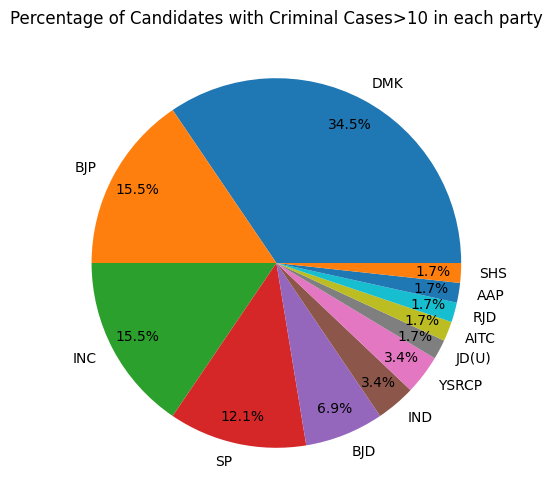

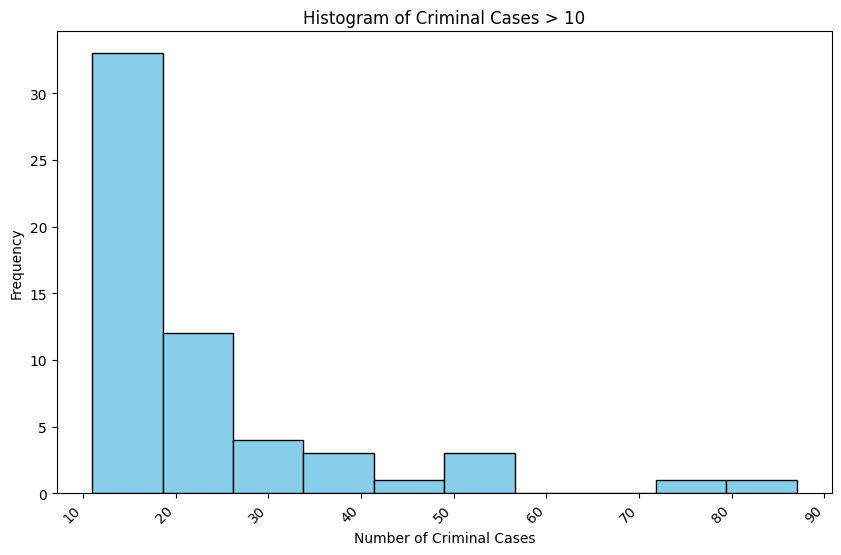

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


filtered_data1 = data[data['Criminal Case'] > 10]

party_counts = filtered_data1['Party'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(party_counts, labels=party_counts.index, autopct='%1.1f%%',pctdistance=0.85)
plt.title('Percentage of Candidates with Criminal Cases>10 in each party')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(filtered_data1['Criminal Case'], bins=10, edgecolor='black',color='skyblue')
plt.xlabel('Number of Criminal Cases')
plt.ylabel('Frequency')
plt.title('Histogram of Criminal Cases > 10')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()


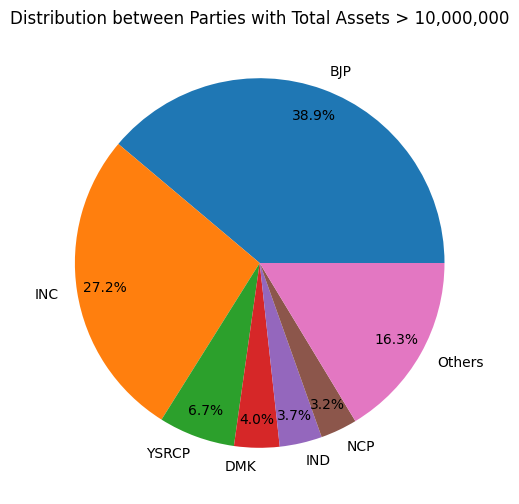

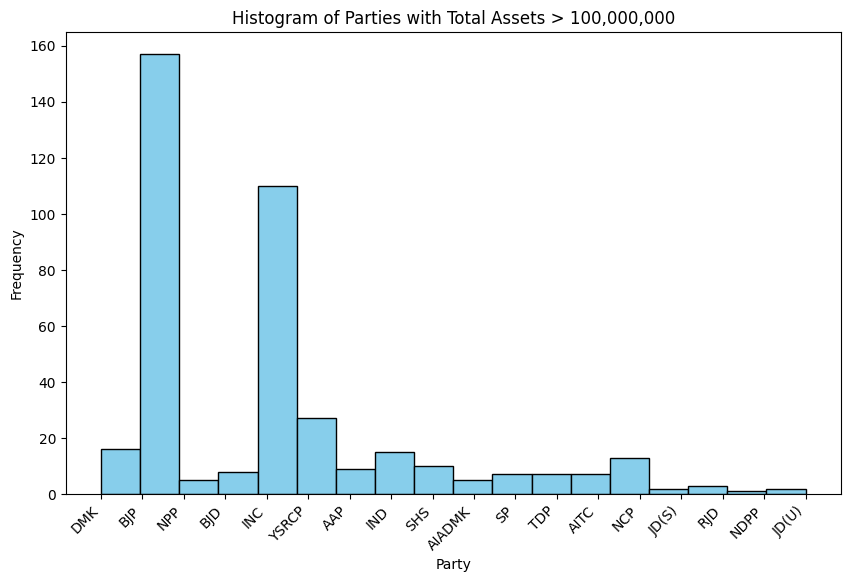

In [5]:
filtered_data2 = data[data['Total Assets'] > 100000000]

party_counts = filtered_data2['Party'].value_counts()

total_parties = party_counts.sum()

party_percentages = party_counts / total_parties * 100

# Combine parties with percentage less than 3% into 'Others'
party_counts_others = party_counts[party_percentages >= 3]
party_counts_others['Others'] = party_counts[party_percentages < 3].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(party_counts_others, labels=party_counts_others.index, autopct='%1.1f%%',pctdistance=0.85)
plt.title('Distribution between Parties with Total Assets > 10,000,000')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(filtered_data2['Party'], bins=len(filtered_data2['Party'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Histogram of Parties with Total Assets > 100,000,000')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()


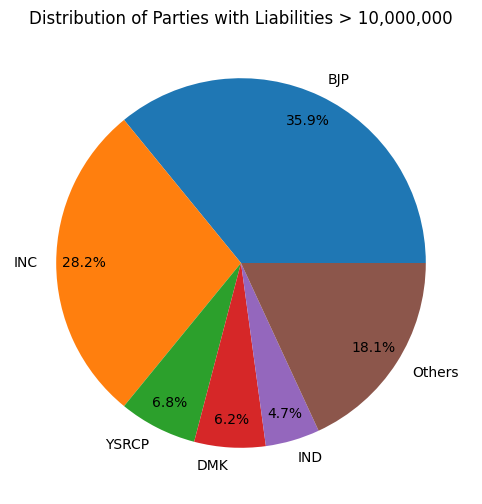

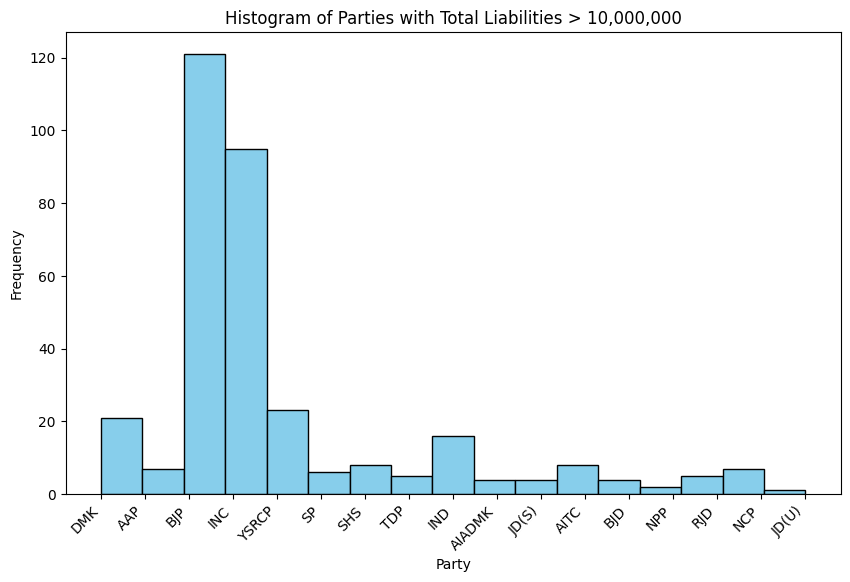

In [6]:
filtered_data3 = data[data['Liabilities'] > 10000000]

party_counts = filtered_data3['Party'].value_counts()

total_parties = party_counts.sum()

party_percentages = party_counts / total_parties * 100

# Combine parties with percentage less than 3% into 'Others'
party_counts_others = party_counts[party_percentages >= 3]
party_counts_others['Others'] = party_counts[party_percentages < 3].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(party_counts_others, labels=party_counts_others.index, autopct='%1.1f%%',pctdistance=0.85)
plt.title('Distribution of Parties with Liabilities > 10,000,000')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(filtered_data3['Party'], bins=len(filtered_data3['Party'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Histogram of Parties with Total Liabilities > 10,000,000')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()

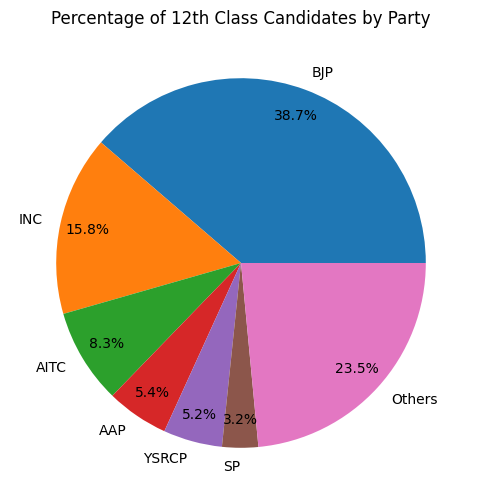

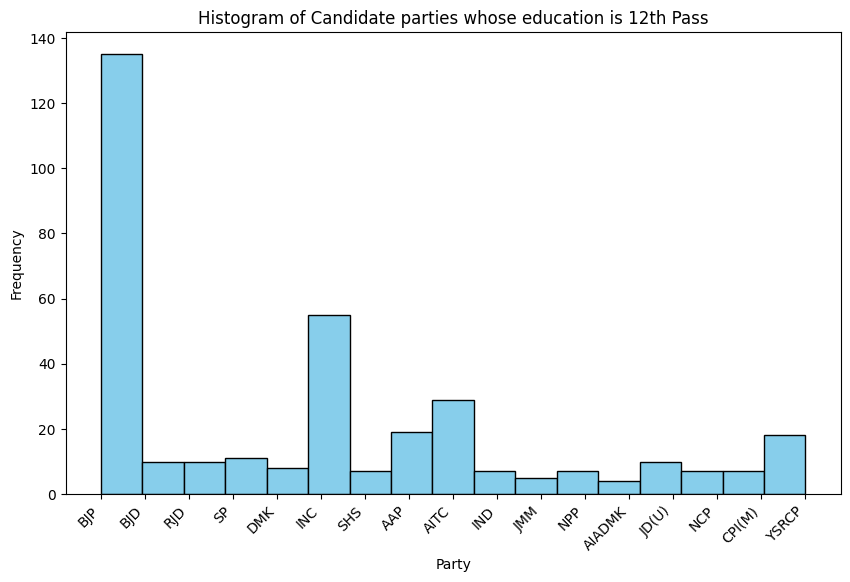

In [7]:

filtered_data4 = data[data['Education'] == '12th Pass']

party_counts = filtered_data4['Party'].value_counts()

total_twelfth_pass = party_counts.sum()

party_percentages = party_counts / total_twelfth_pass * 100

# Combine parties with percentage less than 3% into 'Others'
party_counts_others = party_counts[party_percentages >= 3]
party_counts_others['Others'] = party_counts[party_percentages < 3].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(party_counts_others, labels=party_counts_others.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Percentage of 12th Class Candidates by Party')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(filtered_data4['Party'], bins=len(filtered_data4['Party'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Histogram of Candidate parties whose education is 12th Pass')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()


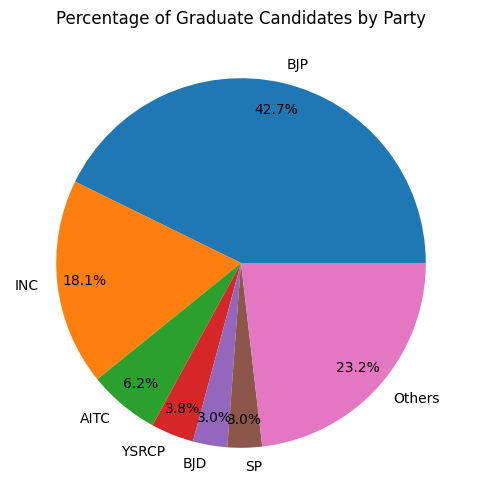

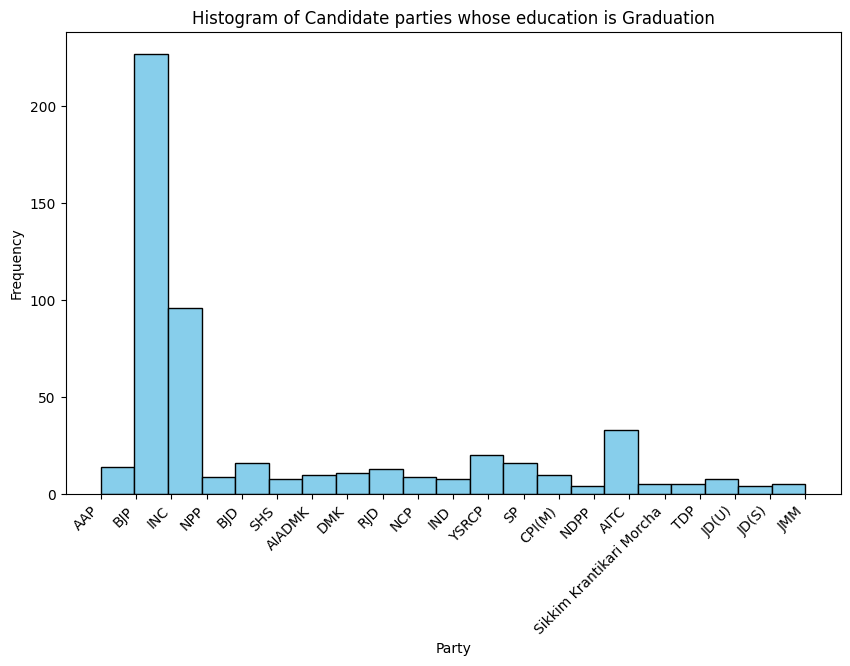

In [9]:


filtered_data4 = data[data['Education'] == 'Graduate']

party_counts = filtered_data4['Party'].value_counts()

total_twelfth_pass = party_counts.sum()

party_percentages = party_counts / total_twelfth_pass * 100

# Combine parties with percentage less than 3% into 'Others'
party_counts_others = party_counts[party_percentages >= 3]
party_counts_others['Others'] = party_counts[party_percentages < 3].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(party_counts_others, labels=party_counts_others.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Percentage of Graduate Candidates by Party')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(filtered_data4['Party'], bins=len(filtered_data4['Party'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Histogram of Candidate parties whose education is Graduation')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()

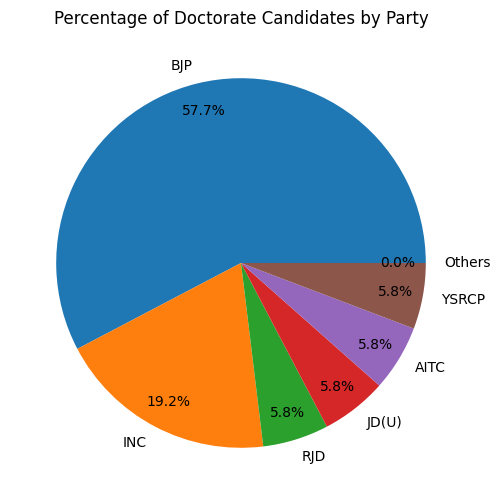

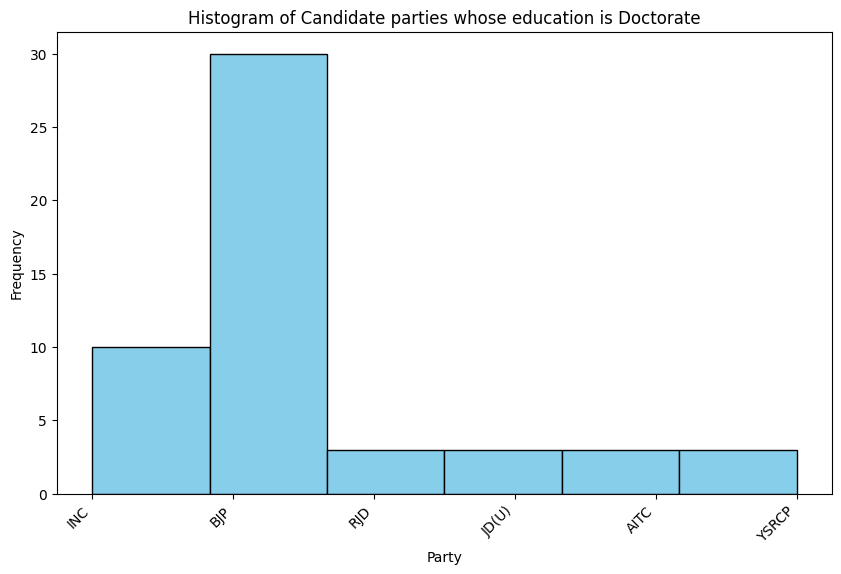

In [10]:
filtered_data4 = data[data['Education'] == 'Doctorate']

party_counts = filtered_data4['Party'].value_counts()

total_twelfth_pass = party_counts.sum()

party_percentages = party_counts / total_twelfth_pass * 100

# Combine parties with percentage less than 3% into 'Others'
party_counts_others = party_counts[party_percentages >= 3]
party_counts_others['Others'] = party_counts[party_percentages < 3].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(party_counts_others, labels=party_counts_others.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Percentage of Doctorate Candidates by Party')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(filtered_data4['Party'], bins=len(filtered_data4['Party'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Histogram of Candidate parties whose education is Doctorate')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()

Mapping Columns to numbers to after Data Vizualization

In [ ]:
# creating a map for parties
unique_parties = data['Party'].unique()
party_map = {party: i for i, party in enumerate(unique_parties)}

data['Party'] = data['Party'].replace(party_map)
test_data['Party'] = test_data['Party'].replace(party_map)



#created a map for Education and stored in definitions
factor = pd.factorize(data['Education'])
data.Education = factor[0]
definitions = factor[1]


# scaling the columns with thier maximum values in train data
max_asset = data['Total Assets'].max()
max_lia = data['Liabilities'].max()

data['Total Assets'] = data['Total Assets'] / max_asset
test_data['Total Assets'] = test_data['Total Assets'] / max_asset

data['Liabilities'] = data['Liabilities'] / max_lia
test_data['Liabilities'] = test_data['Liabilities'] / max_lia

data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2059 non-null   int64  
 1   Candidate       2059 non-null   object 
 2   Constituency ∇  2059 non-null   object 
 3   Party           2059 non-null   int64  
 4   Criminal Case   2059 non-null   int64  
 5   Total Assets    2059 non-null   float64
 6   Liabilities     2059 non-null   float64
 7   state           2059 non-null   int64  
 8   Education       2059 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 144.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1374 non-null   int64  
 1   Candidate       1374 non-null   object 
 2   Constituency ∇  1374 non-null   object 
 3  

### Using Classifier
The following code uses Random classifier to do classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

# X contains the features, excluding the ID, Candidate name, Consistuency,Education columns, and y contains the target variable (Education)
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

# Standardize the features by scaling them to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it
X_test = scaler.transform(X_test)  # Transform testing data using the same scaler

# Define the hyperparameter grid for the Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Perform grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=45), param_grid, cv=5)
grid_search.fit(X_train, y_train)  # Fit grid search on the training data

# Create an Random Forest classifier with the best hyperparameters found during grid search
classifier = RandomForestClassifier(**grid_search.best_params_, random_state=45)
classifier.fit(X_train, y_train) # Fit the classifier on the standardized training data

# Make predictions on the testing set using the trained classifier
y_pred = classifier.predict(X_test)

# Reverse factorize the predicted and actual target values to map them back to their original categories
reversefactor = dict(zip(range(10), definitions))  # definitions is the array of target categories
y_test = np.vectorize(reversefactor.get)(y_test)  # Map numerical categories to their original labels
y_pred = np.vectorize(reversefactor.get)(y_pred)  # Map predicted numerical categories to their original labels


### Model Evaluation
Using Classification report and Confusion Matrix to evalute model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(pd.crosstab(y_test, y_pred, rownames=['Actual Ed'], colnames=['Predicted Ed']))
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Predicted Ed           Graduate  Graduate Professional  Post Graduate
Actual Ed                                                            
10th Pass                    46                      7              6
12th Pass                    86                      1              8
5th Pass                      2                      0              0
8th Pass                     17                      2              3
Doctorate                    18                      0              0
Graduate                    109                      4             10
Graduate Professional        64                      2              9
Literate                      2                      0              0
Others                        8                      0              1
Post Graduate                93                      3             14
Classification Report:
                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.00        59
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test Data
Using the classifier on test data and preparing submission file

In [ ]:
# Create a DataFrame 'sub' with 'ID' column from 'test_data'
sub = pd.DataFrame({"ID": test_data["ID"].values})

# Define the features used in the machine learning model
features = ['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state']

# Make predictions using the classifier model on the specified features
y_final = classifier.predict(test_data[features])

# Dictionary mapping predicted numeric education levels to labels
rev_edu = {
    0: '8th Pass', 1: '12th Pass', 2: 'Post Graduate', 3: 'Graduate Professional',
    4: 'Graduate', 5: '10th Pass', 6: 'Others', 7: 'Doctorate', 8: 'Literate', 9: '5th Pass'
}

# Add 'Education' column to 'sub' DataFrame and populate it with predicted education levels
sub["Education"] = y_final

# Map numeric education levels to their corresponding labels using the 'rev_edu' dictionary
sub["Education"] = sub["Education"].map(rev_edu)

# Write the 'sub' DataFrame to a CSV file named "submission.csv" without including the index column
sub.to_csv("submission.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
